# __Starbucks Capstone Challenge:__

__Combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type__

1. determine demographic groups.
2. determine scenari

In [117]:
%matplotlib inline

In [82]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.weight'] = 'bold'

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

___
## __1. Data exploration and Cleaning__

### exploring `portfolio`

In [2]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [187]:
portfolio.set_index('id', inplace=True)

> Creating code for each offer

In [5]:
portfolio['code'] = portfolio.apply(lambda x: x['offer_type'][0].capitalize()+'.'+str(x['duration']) +'.'+str(x['difficulty']), axis=1)

In [6]:
portfolio.sort_values(by=['offer_type', 'difficulty', 'duration'])

,reward,channels,difficulty,duration,offer_type,code
id,,,,,,
f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo,B.5.5
9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo,B.7.5
4d5c57ea9a6940dd891ad53e9dbe8da0,10,"[web, email, mobile, social]",10,5,bogo,B.5.10
ae264e3637204a6fb9bb56bc8210ddfd,10,"[email, mobile, social]",10,7,bogo,B.7.10
2298d6c36e964ae4a3e7e9706d1fb8c2,3,"[web, email, mobile, social]",7,7,discount,D.7.7
2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,D.7.10
fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount,D.10.10
0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount,D.10.20
5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational,I.3.0


### exploring `profile` 

In [7]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [8]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [9]:
n_users = profile['id'].unique().__len__()
print(f'We found {n_users} unique participants in the profile dataset')

We found 17000 unique participants in the profile dataset


In [188]:
profile.set_index('id', inplace=True)

### exploring `transcript`

In [10]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [11]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [12]:
event_type = transcript['event'].unique()
print(f'we found {event_type} as unique type of event in the transcript dataset')

we found ['offer received' 'offer viewed' 'transaction' 'offer completed'] as unique type of event in the transcript dataset


In [13]:
n_users_trans = transcript.person.unique().__len__()
print(f'We found {n_users} unique participants in the transcript dataset')

We found 17000 unique participants in the transcript dataset


### comparing participants in `transcript` and `profile`

In [14]:
len(set(profile.id).intersection(set(transcript.person)))

17000

`transcript` and `profile` participants fully match. 

__Number of participants with _received offer___

Since we will look at the offer received to measure the impact of each other we will check if all participants recieved at least 1 offer.

In [15]:
user_received = transcript.query('event == "offer received"')['person'].unique()
print(f'{n_users_trans - len(user_received)} participants did not received any offer')

6 participants did not received any offer


In [16]:
no_offer_list = set(profile.id).difference(set(user_received))
transcript.query('person in @no_offer_list')

,person,event,value,time
16379,eb540099db834cf59001f83a4561aef3,transaction,{'amount': 4.74},6
22092,12ede229379747bd8d74ccdc20097ca3,transaction,{'amount': 16.62},18
69477,c6e579c6821c41d1a7a6a9cf936e91bb,transaction,{'amount': 0.65},174
87239,c6e579c6821c41d1a7a6a9cf936e91bb,transaction,{'amount': 1.9100000000000001},222
106812,ae8111e7e8cd4b60a8d35c42c1110555,transaction,{'amount': 17.51},306
108268,eb540099db834cf59001f83a4561aef3,transaction,{'amount': 5.09},318
109340,3a4874d8f0ef42b9a1b72294902afea9,transaction,{'amount': 22.75},324
109815,12ede229379747bd8d74ccdc20097ca3,transaction,{'amount': 27.6},324
110707,ae8111e7e8cd4b60a8d35c42c1110555,transaction,{'amount': 28.7},330
142347,3a4874d8f0ef42b9a1b72294902afea9,transaction,{'amount': 27.2},378


> the 6 participants from `no_offer_list` show transactions with no offer received

### __1. Extract information from `value` dictionary and split it into `amount`, `offer_id`, and `reward`__

In [17]:
def expand_trasncript(transcript):
    
    #change 'offer id' in 'offer_id'
    transcript['n_value'] = transcript['value'].\
        apply(lambda x:{('offer_id' if k=='offer id' else k): v for k, v in x.items()})
    
    #expand dictionary into 3 columns and add to transcript
    n_trans = pd.concat(
        [transcript, pd.json_normalize(transcript['n_value'])],
        axis=1
    )
    
    return n_trans.drop(columns=['value', 'n_value']) # drop obsolete columns

n_trans = expand_trasncript(transcript)
n_trans.head()

,person,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


### __2. Distribution of Offer type in `transcript`__

In [19]:
TRANSCRIPT =  expand_trasncript(pd.read_json('data/transcript.json', orient='records', lines=True))
offer_distribution = TRANSCRIPT.query('event == "offer received"')['offer_id'].value_counts(normalize=True)
offer_distribution = offer_distribution.to_frame(name="received ratio")
offer_distribution['type'] = portfolio.loc[offer_distribution.index, 'offer_type']
offer_distribution.sort_values('type')

,received ratio,type
9b98b8c7a33c4b65b9aebfe6a799e6d9,0.100646,bogo
ae264e3637204a6fb9bb56bc8210ddfd,0.100397,bogo
4d5c57ea9a6940dd891ad53e9dbe8da0,0.099545,bogo
f19421c1d4aa40978ebb69ca19b0e20d,0.099257,bogo
0b1e1539f2cc45b7b9fa7c272da2e1d7,0.100528,discount
2298d6c36e964ae4a3e7e9706d1fb8c2,0.100240,discount
2906b810c7d4411798c6938adc9daaa5,0.100056,discount
fafdcd668e3743c1bb461111dcafc2a4,0.099598,discount
5a8bc65990b245e5a138643cd4eb9837,0.099873,informational
3f207df678b143eea3cee63160fa8bed,0.099860,informational


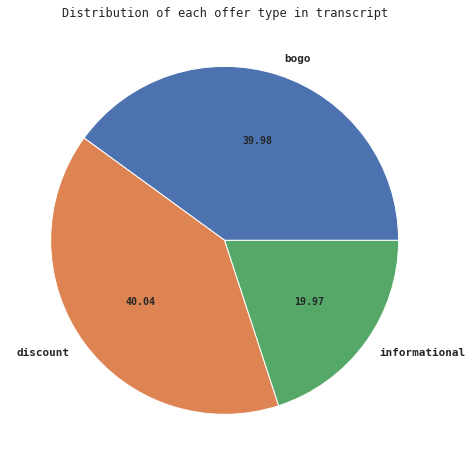

In [20]:
plt.rcParams['figure.figsize'] = 8, 8
pie_data = offer_distribution.groupby('type').sum()
pie_data
plt.pie(
    data=pie_data, 
    x='received ratio', 
    labels= pie_data.index, 
    autopct='%.2f'
)
plt.title('Distribution of each offer type in transcript')
plt.show()

### __3. Analysis of events time-line__

- `offer received` should trigger the offer duration (`portfolio`)
- `offer viewed` should tag this event in success metrics
- `transaction` & `reward` should build the succes metrics

In [46]:
import pandas as pd

PORTFOLIO = pd.read_json('data/portfolio.json', orient='records', lines=True)
PORTFOLIO.set_index('id', inplace=True)
TRANSCRIPT =  expand_trasncript(pd.read_json('data/transcript.json', orient='records', lines=True))

class Person():
    
    def __init__(self, _id):
        self._id = _id
        self.data = TRANSCRIPT.query('person == @_id')
        self.offers = self.data.query('event == "offer received"').index.tolist()
    
    
    def get_transaction(self, start, end):
        if not any(self.data['event'] == 'transaction') or np.isnan(start):
            return []
            
        return self.data.query('(event == "transaction") & (@start <= time <= @end)')[['time', 'amount']]
    
    def get_reward(self, start, end):
        if not any(self.data['event'] == 'offer completed') or np.isnan(start):
            return []
        
        return self.data.query('(event == "offer completed") & (@start <= time <= @end)')[['time', 'reward']]
    

class Event():

    def __init__(self, _id:int, df):
        '''
        INPUTS
        _id - indice of offer according to TRANSCRIPT
        df - dataframe with series of events - usually subset of transcript for 1 user
        '''
        self._id = _id
        self.offer_id = df.loc[self._id,'offer_id']
        self.details = PORTFOLIO.query('id == @self.offer_id')
        self.offer_type = self.details['offer_type'].values[0]
        duration_hours = self.details['duration'].values[0] * 24
        self.start = df.loc[self._id,'time']
        self.end = self.start + duration_hours
        
        self.events = df.query('@self.start <= time <= @self.end')
        
        test_viewed = self.events.query('(event == "offer viewed") & (offer_id == @self.offer_id)')['time']
        test_completed = self.events.query('(event == "offer completed") & (offer_id == @self.offer_id)')['time']
        
        self.viewed = np.nan if test_viewed.empty else test_viewed.values[0]
        self.completed = np.nan if test_completed.empty else test_completed.values[0]


In [50]:
plt.rcParams['figure.figsize']=[10,10]

style_evt = {
    'offer received':'red',
    'offer viewed':'blue',
    'transaction':'black',
    'offer completed':'yellow'
}

from matplotlib.patches import Patch


legend_elements = [
    Patch(facecolor='red', label='offer received'),
    Patch(facecolor='blue', label='offer viewed'),
    Patch(facecolor='black', label='transaction'),
    Patch(facecolor='yellow', label='offer completed')
]

def time_line(event, transactions=[], legend=False):
    ax = plt.gca()
    ymax = 10
    tag = 'VIEWED' if event.viewed > 0 else 'not viewed'
    text = event.details['offer_type'].values[0] + ' / ' +tag
    evt_list = evt.events['event'].tolist()
    color_list = [style_evt[k] for k in evt_list]
    
    
    if len(transactions) > 0:
        ymax = transactions.amount.max()
        ax.plot(transactions.time, transactions.amount, 'ko')
        
    ax.vlines(x=event.events['time'], ymax=ymax, ymin=0, color=color_list)
    ax.fill_between(x=[event.start,event.end], y1=[0,0], y2=[ymax,ymax], alpha=.2)
    ax.set_title(text, ma='right')
    ax.set_xlabel('time (hours)')
    ax.set_ylabel('transaction $')
    
    if legend:
        ax.legend(handles=legend_elements, loc='best')
    
        

### __4. Gathering metrics for analysis__

 - amount of transaction for _viewed_ offer
 - total amount of transaction (_viewed_ and _not viewed_)
 - amount of rewards

In [ ]:
graph_bool = False
user_list = profile['id'].unique()
result = []

for user_id in user_list:
    User = Person(user_id)
    tot_amount = User.data['amount'].sum()
    
    if graph_bool:
        plt.figure()
        _, ax = plt.subplots(nrows=len(User.offers), ncols=1, sharex=True, sharey=False)
        plt.subplots_adjust(hspace=0.3)
        cnt = 0

    for _id in User.offers:
        evt = Event(_id, User.data)    
        trans = User.get_transaction(evt.viewed, evt.end) # transcations if offer is viewed
        trans_all = User.get_transaction(evt.start, evt.end)
        reward = User.get_reward(evt.viewed, evt.end)
        reward_all = User.get_reward(evt.start, evt.end)
        
        # results
        res_trans = np.sum(trans.amount) if len(trans) > 0 else 0 # total spent when offer viewed
        res_reward = np.sum(reward.reward) if len(reward) > 0 else 0
        res_trans_all = np.sum(trans_all.amount) if len(trans_all) > 0 else 0
        res_reward_all = np.sum(reward_all.reward) if len(reward_all) > 0 else 0
        res_tag_viewed = 1 if evt.viewed else 0
        
        res_amount_ratio = res_trans / tot_amount # since offers overlap sometime, sum of ratio not = 1
        
        result.append([
            user_id,
            evt.offer_id,
            evt.offer_type,
            res_trans_all,
            res_trans,
            res_reward_all,
            res_reward,
            res_tag_viewed,
            res_amount_ratio
        ])

        # graphical exploration
        if graph_bool:
            plt.sca(ax[cnt])
            legend = True if cnt == 0 else False
            time_line(evt, trans_all, legend)
            cnt +=1

# results
RES = pd.DataFrame(result, columns=[
    'profile_id', 
    'portfolio_id',
    'portfolio_type',
    'amount_tot',
    'amount_viewed',
    'reward_tot',
    'reward_viewed',
    'view_tag',
    'amount_ratio'
])

if False:
    #save data into ./data/ for future use
    RES.to_csv('./data/res.csv',index=False)


# add demographics
if False:
    new_profile = profile.set_index('id')
    RES_DEMOGRAPHICS = pd.concat(
        [RES, new_profile.reindex(RES['profile_id']).reset_index(drop=True)],
         axis=1
    )

In [58]:
RES = pd.read_csv('./data/res.csv')
RES_copy = RES.copy()
RES_copy.head()

,profile_id,portfolio_id,portfolio_type,amount_tot,amount_viewed,reward_tot,reward_viewed,view_tag,amount_ratio
0,68be06ca386d4c31939f3a4f0e3dd783,2906b810c7d4411798c6938adc9daaa5,discount,0.00,0.00,0.0,0.0,1,0.000000
1,68be06ca386d4c31939f3a4f0e3dd783,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,10.52,10.52,5.0,5.0,1,0.515686
2,68be06ca386d4c31939f3a4f0e3dd783,fafdcd668e3743c1bb461111dcafc2a4,discount,14.84,14.84,5.0,5.0,1,0.727451
3,68be06ca386d4c31939f3a4f0e3dd783,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,12.21,12.21,5.0,5.0,1,0.598529
4,68be06ca386d4c31939f3a4f0e3dd783,fafdcd668e3743c1bb461111dcafc2a4,discount,9.88,9.88,0.0,0.0,1,0.484314


___
## __2. Data Analysis__

__Extract the ratio of money spent for each offer received over the total spent for each person__

> Since some participant recieived the same offer type multiple times we computed the mean `amount_ratio` for each offer received

### __1. Offer Viewed:__

In [61]:
viewed_stack = RES_copy.groupby('portfolio_type')['view_tag'].value_counts()
x_table = viewed_stack.unstack()
x_table.columns = ['not viewed', 'viewed']
x_table

,not viewed,viewed
portfolio_type,,
bogo,939,29560
discount,796,29747
informational,337,14898


In [62]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(x_table)
print(f'the probability of the distribution to be homogeneous is p = {p:.2}')

the probability of the distribution to be homogeneous is p = 1.7e-07


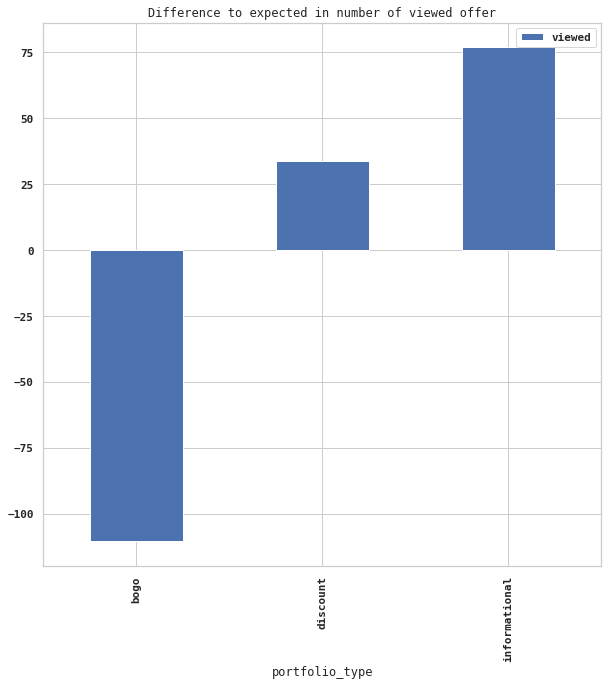

In [70]:
ax = x_table.subtract(expected).plot(kind='bar', y='viewed')
ax.set_title('Difference to expected in number of viewed offer')
plt.show()

> we can conclude that the type of offer impact the number of viewed offer.
It looks like `discount` and `informational` offers were more viewed that `bogo`

__focusing on only viewed offer__

In [91]:
subset_res = RES_copy.query('view_tag == 1')
subset_res.head()

,profile_id,portfolio_id,portfolio_type,amount_tot,amount_viewed,reward_tot,reward_viewed,view_tag,amount_ratio
0,68be06ca386d4c31939f3a4f0e3dd783,2906b810c7d4411798c6938adc9daaa5,discount,0.00,0.00,0.0,0.0,1,0.000000
1,68be06ca386d4c31939f3a4f0e3dd783,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,10.52,10.52,5.0,5.0,1,0.515686
2,68be06ca386d4c31939f3a4f0e3dd783,fafdcd668e3743c1bb461111dcafc2a4,discount,14.84,14.84,5.0,5.0,1,0.727451
3,68be06ca386d4c31939f3a4f0e3dd783,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,12.21,12.21,5.0,5.0,1,0.598529
4,68be06ca386d4c31939f3a4f0e3dd783,fafdcd668e3743c1bb461111dcafc2a4,discount,9.88,9.88,0.0,0.0,1,0.484314


In [93]:
cluster_df = subset_res.groupby(by=['profile_id','portfolio_type'])['amount_ratio'].mean()
cluster_df = cluster_df.unstack()
cluster_df

portfolio_type,bogo,discount,informational
profile_id,,,
0009655768c64bdeb2e877511632db8f,0.110580,0.324295,0.120415
00116118485d4dfda04fdbaba9a87b5c,0.000000,NaN,NaN
0011e0d4e6b944f998e987f904e8c1e5,0.680091,0.358734,0.000000
0020c2b971eb4e9188eac86d93036a77,0.043787,0.249746,0.000000
0020ccbbb6d84e358d3414a3ff76cffd,0.233982,0.302434,0.382149
...,...,...,...
fff3ba4757bd42088c044ca26d73817a,0.045509,0.076532,0.356561
fff7576017104bcc8677a8d63322b5e1,0.140058,0.424683,NaN
fff8957ea8b240a6b5e634b6ee8eafcf,0.000000,0.665844,0.000000


In [100]:
%matplotlib auto

Using matplotlib backend: MacOSX


In [101]:
f = plt.figure(figsize=(6,6))
ax = Axes3D(f)
ax.scatter3D(
    cluster_df.bogo,
    cluster_df.discount, 
    cluster_df.informational,
    marker='o',
    edgecolor='k'
)

plt.xlabel('Buy-One-Get-One')
plt.ylabel('Discount')
ax.set_zlabel('Informational')

Text(0.5, 0, 'Informational')

### __exploring amount of missing values in Results dataset__

In [103]:
cluster_df.isna().mean()

portfolio_type
bogo             0.148405
discount         0.150465
informational    0.401730
dtype: float64

---
## __Question 1: demographic groups__
__descriptive statistics__

In [160]:
profile.columns

Index(['gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')

In [161]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [163]:
profile['became_member_on'] = pd.to_datetime(profile.became_member_on, format="%Y%M%d")
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-01-12 00:02:00,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-01-15 00:07:00,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-01-12 00:07:00,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-01-09 00:05:00,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-01-04 00:08:00,NaN


In [164]:
profile.became_member_on.min(), profile.became_member_on.max()

(Timestamp('2013-01-01 00:08:00'), Timestamp('2018-01-31 00:05:00'))

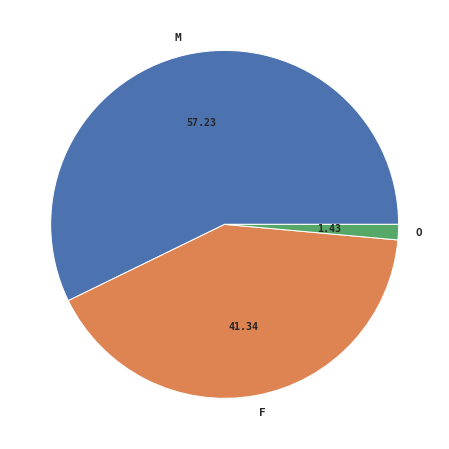

In [182]:
pie_gender = profile.gender.value_counts(normalize=True).to_frame()
pie_gender
plt.pie(
    data=pie_gender,
    x='gender',
    autopct='%.2f',
    labels=pie_gender.index,
    normalize=False
)
plt.show()

### __INCOME DISTRIBUTION__

In [113]:
n_income = len(profile)-profile.income.isna().sum()
mask = (profile.income.isna())
income_range = np.sort(profile.income[~mask].unique())
income_range

array([ 30000.,  31000.,  32000.,  33000.,  34000.,  35000.,  36000.,
        37000.,  38000.,  39000.,  40000.,  41000.,  42000.,  43000.,
        44000.,  45000.,  46000.,  47000.,  48000.,  49000.,  50000.,
        51000.,  52000.,  53000.,  54000.,  55000.,  56000.,  57000.,
        58000.,  59000.,  60000.,  61000.,  62000.,  63000.,  64000.,
        65000.,  66000.,  67000.,  68000.,  69000.,  70000.,  71000.,
        72000.,  73000.,  74000.,  75000.,  76000.,  77000.,  78000.,
        79000.,  80000.,  81000.,  82000.,  83000.,  84000.,  85000.,
        86000.,  87000.,  88000.,  89000.,  90000.,  91000.,  92000.,
        93000.,  94000.,  95000.,  96000.,  97000.,  98000.,  99000.,
       100000., 101000., 102000., 103000., 104000., 105000., 106000.,
       107000., 108000., 109000., 110000., 111000., 112000., 113000.,
       114000., 115000., 116000., 117000., 118000., 119000., 120000.])

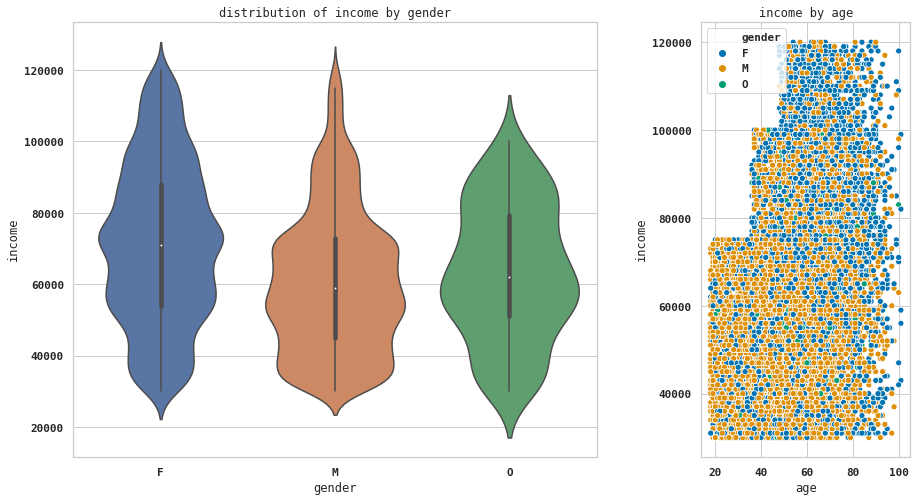

In [176]:
plt.rcParams['figure.figsize'] = 15, 8
subset_118 = profile.query('age < 118')

f = plt.figure()
gs = plt.GridSpec(1,3, figure=f, wspace=0.5)
ax1 = f.add_subplot(gs[0,:2])
ax2 = f.add_subplot(gs[0,-1])
sns.violinplot(data=profile, x='gender', y='income', ax=ax1, alpha=0.7)
sns.scatterplot(data=subset_118, x='age', y='income', hue='gender', palette='colorblind', ax=ax2)
ax1.set_title('distribution of income by gender')
ax2.set_title('income by age')
plt.show()

In [147]:
g.ax.clear()

---
## __Clustering Analysis__

__1. K_pod method to apply kmeans to dataset with missing data__

 - (reference)
 - (explanation)

In [192]:
from kPOD import k_pod

In [361]:
RES_ratio.to_numpy()

array([[0.11057994, 0.32429467, 0.12041536],
       [0.        ,        nan,        nan],
       [0.68009061, 0.35873395, 0.        ],
       ...,
       [0.        , 0.66584362, 0.        ],
       [0.17208901,        nan, 0.06337949],
       [0.19135666, 0.29755386,        nan]])

In [378]:
#set the number of clusters
k=3

# use data with missing values to perform clustering
clustered_data = k_pod(RES_ratio.to_numpy(), k)

In [379]:
cluster_labels = clustered_data[0]

In [ ]:
for offer in RES_ratio:
    sns.boxplot(
        x=cluster_labels,
        y=offer,
        data=RES_ratio
    )
    plt.ylabel(f'{offer}')
    plt.show()

__2. Tradiational Kmeans clustering by changing missing values with median__

We are replacing each missing values with the median from the related category: `bogo`, `discount`, or `informational` 

In [104]:
# RES_median = RES_ratio.apply(lambda x: x.fillna(x.median()),axis=0)
RES_median = cluster_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [105]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

range_n_clusters = list(range(2,20))

X = RES_median.to_numpy()


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 20])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    if True:
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3055196019242695
For n_clusters = 3 The average silhouette_score is : 0.2960675323373163
For n_clusters = 4 The average silhouette_score is : 0.29923493484830094
For n_clusters = 5 The average silhouette_score is : 0.32122220021713294
For n_clusters = 6 The average silhouette_score is : 0.3173094948625269
For n_clusters = 7 The average silhouette_score is : 0.3235761488547765
For n_clusters = 8 The average silhouette_score is : 0.32819425663648044
For n_clusters = 9 The average silhouette_score is : 0.3286354725135624
For n_clusters = 10 The average silhouette_score is : 0.34057747757524803
For n_clusters = 11 The average silhouette_score is : 0.3447913805878894
For n_clusters = 12 The average silhouette_score is : 0.349444337964131
For n_clusters = 13 The average silhouette_score is : 0.35312190271715055
For n_clusters = 14 The average silhouette_score is : 0.35760739442813844
For n_clusters = 15 The average silhouette_score is : 

__3. Implementing silhouette analysis to k-pod__

In [106]:
from sklearn.metrics import silhouette_samples, silhouette_score
from kPOD import k_pod
import matplotlib.cm as cm

range_n_clusters = list(range(2,16))

X = cluster_df.copy().to_numpy()

def replace_by_centroids(data, labels, centers):
    #locate missing data
    locs = np.argwhere(np.isnan(data))
    for i in locs:
        row=i[0]
        col=i[1]
        lab = int(labels[row])
        center = centers[lab][col]
        
        data[row,col] = center
    
    return data


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 20])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = k_pod(n_clusters=n_clusters, data=X)
    cluster_labels = clusterer[0]
    centers = clusterer[1]
    
    # replace missing data with centroids
    X = replace_by_centroids(X, cluster_labels, centers)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    
    # Draw white circles at cluster centers
    centers = np.vstack(centers)
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.49813709513516274
For n_clusters = 3 The average silhouette_score is : 0.3940713152590593
For n_clusters = 4 The average silhouette_score is : 0.40385171777843937
For n_clusters = 5 The average silhouette_score is : 0.34577921906032144
For n_clusters = 6 The average silhouette_score is : 0.3122278917979299
For n_clusters = 7 The average silhouette_score is : 0.26139462311493666
For n_clusters = 8 The average silhouette_score is : 0.23167106655159544
For n_clusters = 9 The average silhouette_score is : 0.2710379487731135
For n_clusters = 10 The average silhouette_score is : 0.2561860329173236
For n_clusters = 11 The average silhouette_score is : 0.2604456079993011
For n_clusters = 12 The average silhouette_score is : 0.2629361952444603
For n_clusters = 13 The average silhouette_score is : 0.2466067534681341
For n_clusters = 14 The average silhouette_score is : 0.23763606798770787
For n_clusters = 15 The average silhouette_score is :

### __3D Graphical representation__

In [367]:
from mpl_toolkits.mplot3d import Axes3D

In [434]:
%matplotlib auto

Using matplotlib backend: MacOSX


In [110]:
X = cluster_df.to_numpy()
clusterer = k_pod(n_clusters=3, data=X)
cluster_labels = clusterer[0]
centers = clusterer[1]

# replace missing data with centroids
X = replace_by_centroids(X, cluster_labels, centers)

In [111]:
col = sns.color_palette("colorblind", len(cluster_labels))
palette = [col[int(x)] for x in cluster_labels]

f = plt.figure(figsize=(6,6))
ax = Axes3D(f)
ax.scatter3D(
    cluster_df.bogo, 
    cluster_df.discount, 
    cluster_df.informational,
    marker='o',
    edgecolor='k',
    c=palette
)

plt.xlabel('Buy-One-Get-One')
plt.ylabel('Discount')
ax.set_zlabel('Informational')

Text(0.5, 0, 'Informational')

In [432]:
X[0]

array([0.11057994, 0.32429467, 0.12041536])

## __Building ML model over multiple outputs__

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
RES_copy

,profile_id,portfolio_id,portfolio_type,amount_tot,amount_viewed,reward_tot,reward_viewed,view_tag,amount_ratio
0,68be06ca386d4c31939f3a4f0e3dd783,2906b810c7d4411798c6938adc9daaa5,discount,0.00,0.00,0.0,0.0,1,0.000000
1,68be06ca386d4c31939f3a4f0e3dd783,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,10.52,10.52,5.0,5.0,1,0.515686
2,68be06ca386d4c31939f3a4f0e3dd783,fafdcd668e3743c1bb461111dcafc2a4,discount,14.84,14.84,5.0,5.0,1,0.727451
3,68be06ca386d4c31939f3a4f0e3dd783,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,12.21,12.21,5.0,5.0,1,0.598529
4,68be06ca386d4c31939f3a4f0e3dd783,fafdcd668e3743c1bb461111dcafc2a4,discount,9.88,9.88,0.0,0.0,1,0.484314
...,...,...,...,...,...,...,...,...,...
76272,9dc1421481194dcd9400aec7c9ae6366,ae264e3637204a6fb9bb56bc8210ddfd,bogo,58.50,45.93,10.0,0.0,1,0.242157
76273,e4052622e5ba45a8b96b59aba68cf068,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,68.27,68.27,3.0,3.0,1,0.477346
76274,e4052622e5ba45a8b96b59aba68cf068,3f207df678b143eea3cee63160fa8bed,informational,0.00,0.00,0.0,0.0,1,0.000000
76275,e4052622e5ba45a8b96b59aba68cf068,f19421c1d4aa40978ebb69ca19b0e20d,bogo,50.04,0.00,5.0,0.0,1,0.000000


In [181]:
RES_ratio = subset_res.groupby(by=['profile_id','portfolio_type'])['amount_ratio'].mean()
RES_ratio = RES_ratio.unstack()
RES_ratio

portfolio_type,bogo,discount,informational
profile_id,,,
0009655768c64bdeb2e877511632db8f,0.110580,0.324295,0.120415
00116118485d4dfda04fdbaba9a87b5c,0.000000,NaN,NaN
0011e0d4e6b944f998e987f904e8c1e5,0.680091,0.358734,0.000000
0020c2b971eb4e9188eac86d93036a77,0.043787,0.249746,0.000000
0020ccbbb6d84e358d3414a3ff76cffd,0.233982,0.302434,0.382149
...,...,...,...
fff3ba4757bd42088c044ca26d73817a,0.045509,0.076532,0.356561
fff7576017104bcc8677a8d63322b5e1,0.140058,0.424683,NaN
fff8957ea8b240a6b5e634b6ee8eafcf,0.000000,0.665844,0.000000


In [241]:
id_list = list(RES_ratio.index)

In [292]:
# create matching labels matrix
def create_demographics(id_list: list):
    df_demo = profile.reindex(id_list)
    
    #age brackets
    '''divide age in 8 brackets'''
    bins_age = [0, 25, 35, 45, 55, 65, 75, 85, 110]
    lab_age = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85']
    df_demo['age_brackets'] = pd.cut(df_demo['age'], bins=bins_age, labels=lab_age, right=False)
    
    #membership year
    '''keep only the year of membership'''
    df_demo['became_member_on'] = pd.to_datetime(df_demo['became_member_on'], format='%Y%m%d')
    df_demo['year_member'] = df_demo['became_member_on'].apply(lambda x:x.year)
    df_demo['year_member'] = df_demo['year_member'].astype('category')
    
    #income brackets
    '''divide income in 8 brackets'''
    bins_income = [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 120000]
    lab_income = ['<40k', '40k-49k', '50k-59k', '60k-69k', '70k-79k', '80k-89k', '90k-99k', '>100k']
    df_demo['income_brackets'] = pd.cut(df_demo['income'], bins=bins_income, labels=lab_income, right=False)
    
    
    
    
    col_to_keep = ['gender', 'age_brackets', 'year_member', 'income_brackets']
    df = pd.get_dummies(df_demo[col_to_keep])
    
    return df

df_demo = create_demographics(id_list)

In [293]:
df_demo

,gender_F,gender_M,gender_O,age_brackets_<25,age_brackets_25-34,age_brackets_35-44,age_brackets_45-54,age_brackets_55-64,age_brackets_65-74,age_brackets_75-84,...,year_member_2017,year_member_2018,income_brackets_<40k,income_brackets_40k-49k,income_brackets_50k-59k,income_brackets_60k-69k,income_brackets_70k-79k,income_brackets_80k-89k,income_brackets_90k-99k,income_brackets_>100k
id,,,,,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
00116118485d4dfda04fdbaba9a87b5c,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0011e0d4e6b944f998e987f904e8c1e5,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
0020c2b971eb4e9188eac86d93036a77,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
0020ccbbb6d84e358d3414a3ff76cffd,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
fff7576017104bcc8677a8d63322b5e1,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
fff8957ea8b240a6b5e634b6ee8eafcf,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [291]:
pd.get_dummies(df_demo)

,gender_F,gender_M,gender_O,age_brackets_<25,age_brackets_25-34,age_brackets_35-44,age_brackets_45-54,age_brackets_55-64,age_brackets_65-74,age_brackets_75-84,...,year_member_2017,year_member_2018,income_brackets_<40k,income_brackets_40k-49k,income_brackets_50k-59k,income_brackets_60k-69k,income_brackets_70k-79k,income_brackets_80k-89k,income_brackets_90k-99k,income_brackets_>100k
id,,,,,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
00116118485d4dfda04fdbaba9a87b5c,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0011e0d4e6b944f998e987f904e8c1e5,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
0020c2b971eb4e9188eac86d93036a77,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
0020ccbbb6d84e358d3414a3ff76cffd,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
fff7576017104bcc8677a8d63322b5e1,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
fff8957ea8b240a6b5e634b6ee8eafcf,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [203]:
toto = pd.to_datetime(df_demo['became_member_on'],format='%Y%m%d')

In [204]:
type(toto)

pandas.core.series.Series

In [207]:
toto[0].year

2017

<AxesSubplot:>

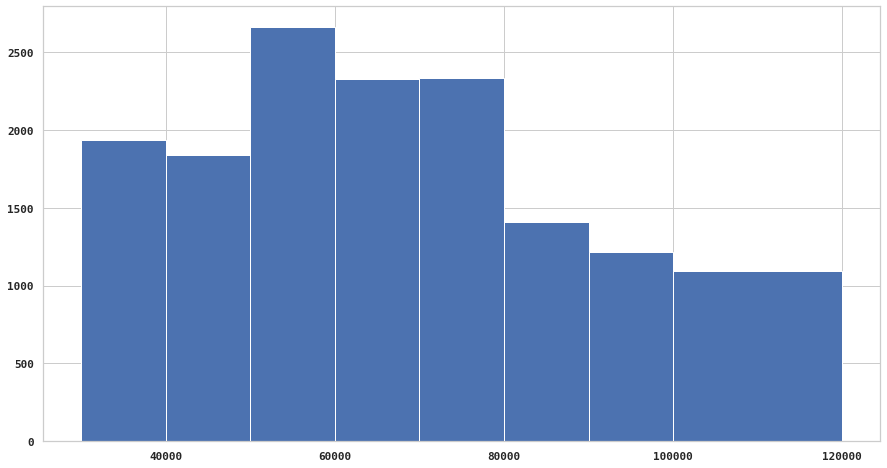

In [274]:
bins = [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 120000]
df_demo['income'].hist(bins=bins)

In [265]:
np.array([0, 40, 50, 60, 70, 80, 90, 100, 120])*1000

array([     0,  40000,  50000,  60000,  70000,  80000,  90000, 100000,
       120000])

In [248]:
df_demo['age'].apply(lambda x: round(x,-1))

id
0009655768c64bdeb2e877511632db8f     30
00116118485d4dfda04fdbaba9a87b5c    120
0011e0d4e6b944f998e987f904e8c1e5     40
0020c2b971eb4e9188eac86d93036a77     60
0020ccbbb6d84e358d3414a3ff76cffd     20
                                   ... 
fff3ba4757bd42088c044ca26d73817a     70
fff7576017104bcc8677a8d63322b5e1     70
fff8957ea8b240a6b5e634b6ee8eafcf     70
fffad4f4828548d1b5583907f2e9906b     30
ffff82501cea40309d5fdd7edcca4a07     40
Name: age, Length: 16994, dtype: int64

In [253]:
bins = [0, 40, 50, 60, 70, 80, 90, 100, 120]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85']

In [254]:
pd.cut(df_demo['age'], bins=bins, labels=labels, right=False)

id
0009655768c64bdeb2e877511632db8f    25-34
00116118485d4dfda04fdbaba9a87b5c      NaN
0011e0d4e6b944f998e987f904e8c1e5    35-44
0020c2b971eb4e9188eac86d93036a77    55-64
0020ccbbb6d84e358d3414a3ff76cffd      <25
                                    ...  
fff3ba4757bd42088c044ca26d73817a    65-74
fff7576017104bcc8677a8d63322b5e1    65-74
fff8957ea8b240a6b5e634b6ee8eafcf    65-74
fffad4f4828548d1b5583907f2e9906b    25-34
ffff82501cea40309d5fdd7edcca4a07    45-54
Name: age, Length: 16994, dtype: category
Categories (8, object): ['<25' < '25-34' < '35-44' < '45-54' < '55-64' < '65-74' < '75-84' < '>85']